# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Disappointing service, pla..."
1,✅ Trip Verified | A transit visa is required...
2,✅ Trip Verified | I was surprised to receive...
3,"✅ Trip Verified | Flight cancelled, not refu..."
4,"✅ Trip Verified | I had visa issues, and hen..."


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# df = pd.read_csv("data/BA_reviews.csv", index_col=0)

df['reviews'] = df['reviews'].str.replace(r'^((✅ Trip Verified \|\s* |Not Verified \|\s* |\s*))', '', regex=True)
df.head()
# df.to_csv("data/BA_reviews_clean.csv")


,reviews
0,"Disappointing service, plane interior and terr..."
1,A transit visa is required for my partner to t...
2,I was surprised to receive confirmation pre-f...
3,"Flight cancelled, not refunding our money sayi..."
4,"I had visa issues, and hence, was debarred fro..."


## Data Analysis
### Setiment analysis
By reviewing sentiment analysis, we can visualize the distribution  of positive, neutral and negative sentiments in the reviews

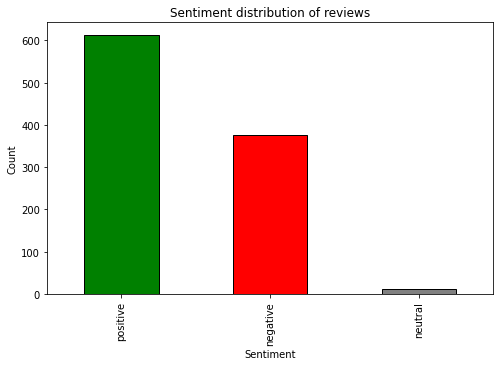

In [6]:
import matplotlib.pyplot as plt
from textblob import TextBlob

df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Count each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Plotting the data
plt.figure(figsize=(8,5))
sentiment_counts.plot(kind='bar', color=['green','red','grey'], edgecolor='black')
plt.title('Sentiment distribution of reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


We could also plot it in a pie chart view

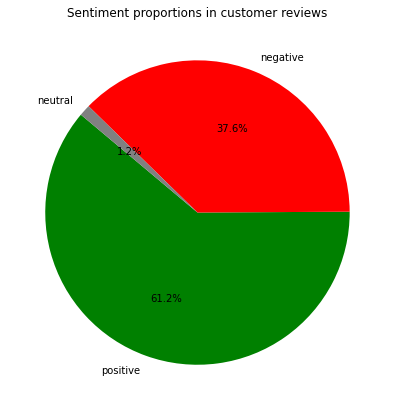

In [27]:
# Pie chart for sentiment categories
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'grey'])
plt.title('Sentiment proportions in customer reviews')
plt.show()


## Common words in reviews
We can analyze the common words used in the reviews to give insights on what most customers are saying about their experience with the comapny

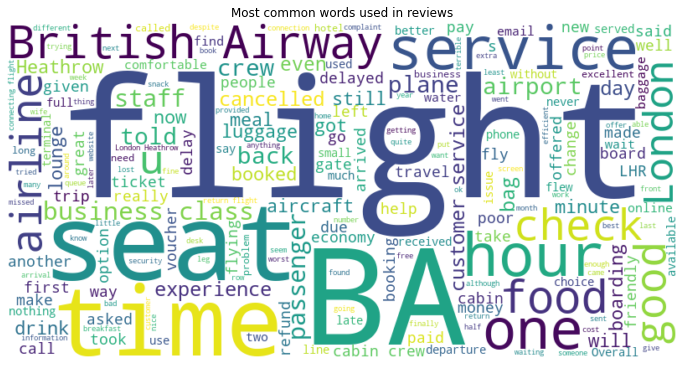

In [ ]:
from wordcloud import WordCloud, STOPWORDS

all_reviews = ' '.join(df['reviews'])

# Step to generate wordcoud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words used in reviews')
plt.show()

It's overcrowded with the words of "British Airways/BA" and it's not insightful as we know we're analysing about the company anyways. With some more cleanup, we come up with this:


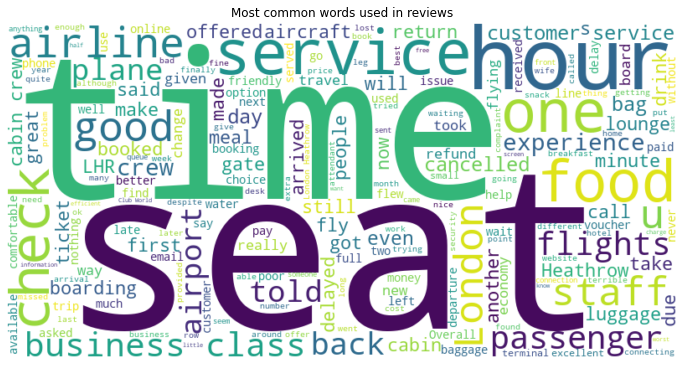

In [ ]:
from wordcloud import WordCloud, STOPWORDS
custom_stopwords = {"British", "Airway", "Airways", "British Airway", "BA", "flight"}

stopwords = STOPWORDS.union(custom_stopwords)

# Step to generate wordcoud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_reviews)

# Plot wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words used in reviews')
plt.show()

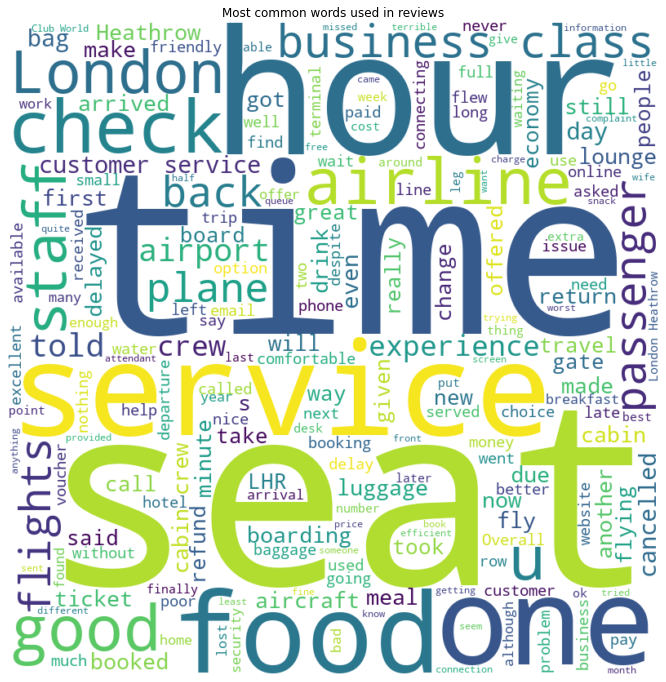

In [28]:
from wordcloud import WordCloud, STOPWORDS
custom_stopwords = {"British", "Airway", "Airways", "British Airway", "BA", "flight"}

stopwords = STOPWORDS.union(custom_stopwords)

# Step to generate wordcoud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords).generate(all_reviews)

# Plot wordcloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words used in reviews')
plt.show()